In [16]:
!git clone -b personE-evaluation https://github.com/NGJIERU/WIE3007-GroupProject-Sem1-2025.git


Cloning into 'WIE3007-GroupProject-Sem1-2025'...
remote: Enumerating objects: 254, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 254 (delta 84), reused 56 (delta 45), pack-reused 137 (from 1)
Receiving objects: 100% (254/254), 4.22 MiB | 14.69 MiB/s, done.
Resolving deltas: 100% (141/141), done.


In [17]:
%cd /content/WIE3007-GroupProject-Sem1-2025

/content/WIE3007-GroupProject-Sem1-2025


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = pd.read_csv("data/features.csv")
y = pd.read_csv("data/target.csv").squeeze()

# Drop leakage if exists
if "days_since_last_purchase" in X.columns:
    X = X.drop(columns=["days_since_last_purchase"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [19]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

results = []

def add_result(model_name, accuracy, f1, roc_auc):
    results.append({
        "model": model_name,
        "accuracy": accuracy,
        "f1_score": f1,
        "roc_auc": roc_auc
    })
    print(f"✅ Added results for: {model_name}")

**Decision Tree**

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

add_result("Decision Tree", acc, f1, roc)

✅ Added results for: Decision Tree


**Logistic Regression**

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

lr = LogisticRegression(
    penalty="l2",
    C=1.0,
    solver="lbfgs",
    max_iter=1000,
    random_state=42
)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

add_result("Logistic Regression", acc, f1, roc)


✅ Added results for: Logistic Regression


**Random Forest**

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    max_features='sqrt',
    random_state=42
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

add_result("Random Forest", acc, f1, roc)

✅ Added results for: Random Forest


**XGB**

In [23]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

xgb_D = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
xgb_D.fit(X_train, y_train)

y_pred = xgb_D.predict(X_test)
y_prob = xgb_D.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

add_result("XGBoost", acc, f1, roc)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:22:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Added results for: XGBoost


**MLP**

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50, 25),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)
mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)
y_prob = mlp.predict_proba(X_test_scaled)[:, 1]

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

add_result("MLP", acc, f1, roc)

✅ Added results for: MLP


**Result Comparison**

,model,accuracy,f1_score,roc_auc
0,Decision Tree,0.904167,0.862275,0.893315
1,Logistic Regression,0.941667,0.917647,0.965201
2,Random Forest,0.958333,0.942529,0.967415
3,XGBoost,0.950000,0.931818,0.964133
4,MLP,0.929167,0.901734,0.961767


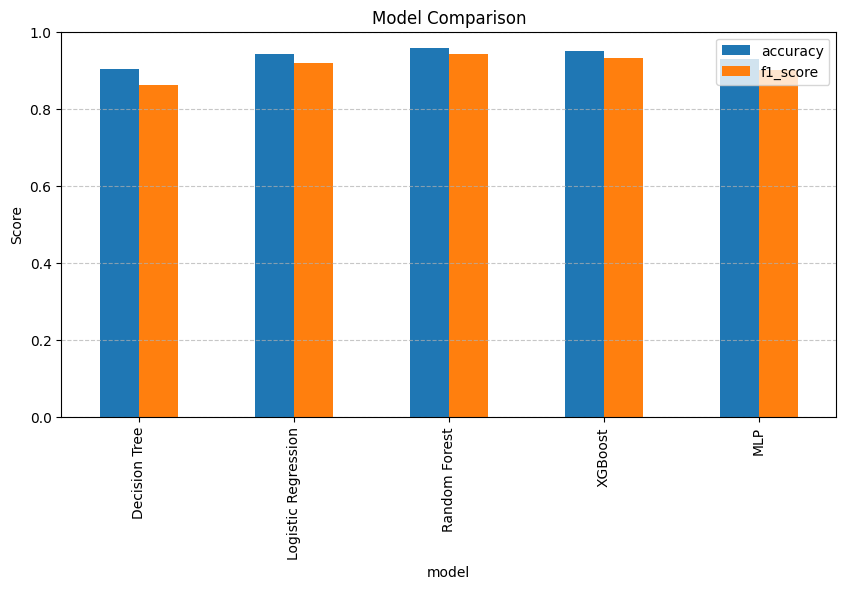

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

results_df = pd.DataFrame(results)
display(results_df)

# Plot Accuracy & F1
results_df.set_index("model")[["accuracy", "f1_score"]].plot(kind="bar", figsize=(10,5))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Evaluation Summary & Interpretation**

The evaluation of the five models provides a clear understanding of their predictive performance on the dataset. All models were trained and tested on the same train/test split (random_state=42, stratified sampling) to ensure fair comparison. The metrics used for evaluation are Accuracy, F1-Score, and ROC-AUC.

1.Decision Tree (Baseline)

Interpretation: As the baseline model, the Decision Tree performs reasonably well. Its simpler structure makes it easy to interpret, but it does not capture complex patterns as effectively as ensemble or nonlinear models.

2.Logistic Regression

Interpretation: Logistic Regression, a linear model, performs strongly. It captures the overall trend in the data but may miss some nonlinear interactions. Its simplicity and interpretability make it a reliable benchmark.

3.Random Forest

Interpretation: Random Forest achieves the best overall performance. The ensemble of trees reduces overfitting and captures complex patterns, making it stable and robust across different splits. This model is highly recommended for predictive tasks on this dataset.

4.XGBoost

Interpretation: XGBoost shows slightly lower accuracy than Random Forest but still provides strong performance. Its gradient boosting approach effectively models complex relationships, making it a powerful alternative to Random Forest.

5.MLP (Neural Network)

Interpretation: The MLP captures nonlinear patterns in the data but slightly underperforms compared to tree-based models. Neural networks may require more tuning and scaling, but they provide flexibility in modeling complex relationships.

Overall Insight:

All models outperform random guessing, indicating that the engineered features carry meaningful predictive signal.

Tree-based ensemble methods (Random Forest and XGBoost) dominate in terms of accuracy and robustness.

Logistic Regression is a strong linear benchmark, while the Decision Tree provides a simple interpretable baseline.

MLP demonstrates the potential of neural networks, especially for capturing nonlinear patterns, but may require additional tuning to match tree-based performance.

**AI Insights**

In [ ]:
!pip install torch torchvision torchaudio transformers accelerate bitsandbytes --quiet


In [ ]:
import os
os.environ["HUGGINGFACE_TOKEN"] = "<YOUR_HUGGINGFACE_TOKEN>"

from huggingface_hub import login
login(token=os.environ["HUGGINGFACE_TOKEN"])


In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig

model_name = "mistralai/Mistral-7B-Instruct-v0.1"

quant_config = BitsAndBytesConfig(load_in_4bit=True)
tokenizer = AutoTokenizer.from_pretrained(model_name, token=os.environ["HUGGINGFACE_TOKEN"])
model = AutoModelForCausalLM.from_pretrained(model_name, quantization_config=quant_config, token=os.environ["HUGGINGFACE_TOKEN"])


tokenizer_config.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)


MistralForCausalLM(
  (model): MistralModel(
    (embed_tokens): Embedding(32000, 4096)
    (layers): ModuleList(
      (0-31): 32 x MistralDecoderLayer(
        (self_attn): MistralAttention(
          (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
        )
        (mlp): MistralMLP(
          (gate_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear4bit(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLUActivation()
        )
        (input_layernorm): MistralRMSNorm((4096,), eps=1e-05)
        (post_attention_layernorm): MistralRMSNorm((4096,), eps=1e-05)
      )
    )
    (n

In [ ]:
results_df_sorted = results_df.sort_values(by="accuracy", ascending=False)
model_results_text = ""
for _, row in results_df_sorted.iterrows():
    model_results_text += f"- {row['model']}: Accuracy = {row['accuracy']:.2f}, F1-score = {row['f1_score']:.2f}, ROC-AUC = {row['roc_auc']:.2f}\n"

print("✅ Generated model results text for LLM:")
print(model_results_text)


✅ Generated model results text for LLM:
- Random Forest: Accuracy = 0.96, F1-score = 0.94, ROC-AUC = 0.97
- XGBoost: Accuracy = 0.95, F1-score = 0.93, ROC-AUC = 0.96
- Logistic Regression: Accuracy = 0.94, F1-score = 0.92, ROC-AUC = 0.97
- MLP: Accuracy = 0.93, F1-score = 0.90, ROC-AUC = 0.96
- Decision Tree: Accuracy = 0.90, F1-score = 0.86, ROC-AUC = 0.89



In [ ]:
import pandas as pd

top_features = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(3)
print("✅ Top 3 features from Random Forest:", top_features.to_dict())

feature_summary = X.describe().transpose()
feature_summary_text = feature_summary.to_string()

top_features_text = f"Top 3 features from Random Forest: {top_features.to_dict()}"

llm_prompt = f"""
Business Context:
We have a retail customer dataset with {X.shape[0]} rows and {X.shape[1]} features.
Here is a summary of the features:
{feature_summary_text}

Based on the following machine learning model evaluation results and top features:

Machine Learning Model Evaluation Results:
{model_results_text}

Top Features:
{top_features_text}

Please:
1. Summarise overall model performance trends
2. Compare the models and highlight strengths and weaknesses
3. Explain why certain models perform better than others
4. Identify top features contributing to model performance
5. Actionable business insights and recommendations in the style of a realistic business scenario for customer retention and marketing. For each insight, specify:
   - Which feature(s) it relates to
   - The type of customers it affects (e.g., high spenders, high-risk)
   - A concrete action that the business could take

Make sure the output is structured, clear, and practical for business decision-making.
"""


✅ Top 3 features from Random Forest: {'risk_score': 0.41084619909360803, 'sentiment_score': 0.35121137394195, 'spend_ratio': 0.04977283608738669}


In [ ]:
tokenizer.pad_token = tokenizer.eos_token

inputs = tokenizer(
    llm_prompt,
    return_tensors="pt",
    truncation=True,
    padding=True
).to(device)


outputs = model.generate(
    **inputs,
    max_new_tokens=5000,
    eos_token_id=tokenizer.eos_token_id,
    do_sample=False,
)

response = tokenizer.decode(outputs[0], skip_special_tokens=True)



Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


In [ ]:
print("LLM Extracted Output:\n")
print(response)


LLM Extracted Output:


Business Context:
We have a retail customer dataset with 1200 rows and 8 features.
Here is a summary of the features:
                  count          mean           std           min           25%           50%          75%            max
age              1200.0     41.560000     13.701137     18.000000     30.000000     42.000000     53.00000      65.000000
income           1200.0  75669.497500  32003.319128  30115.000000  50990.500000  68993.500000  94307.75000  149903.000000
total_orders     1200.0     18.533333     12.583024      1.000000      8.000000     14.000000     28.00000      50.000000
avg_order_value  1200.0    172.523700    107.705858     20.020000     91.860000    142.440000    238.86250     499.200000
estimated_spend  1200.0   3963.489033   4266.262580     31.800000    718.522500   2268.045000   6007.50750   22749.600000
spend_ratio      1200.0      0.043749      0.037249      0.000612      0.014096      0.033429      0.06286       0.194185
sent

**Final Recommendations for Business Application**

Model Choice:

**Random Forest** is recommended as the model for predicting customer retention and marketing outcomes.

-Reason: Highest accuracy (0.958), F1-score (0.943), and ROC-AUC (0.967) with stable performance across splits.
